This code shows the effect of a simple delay filter compared to low pass filter when the frequency of periodic noise is known.  

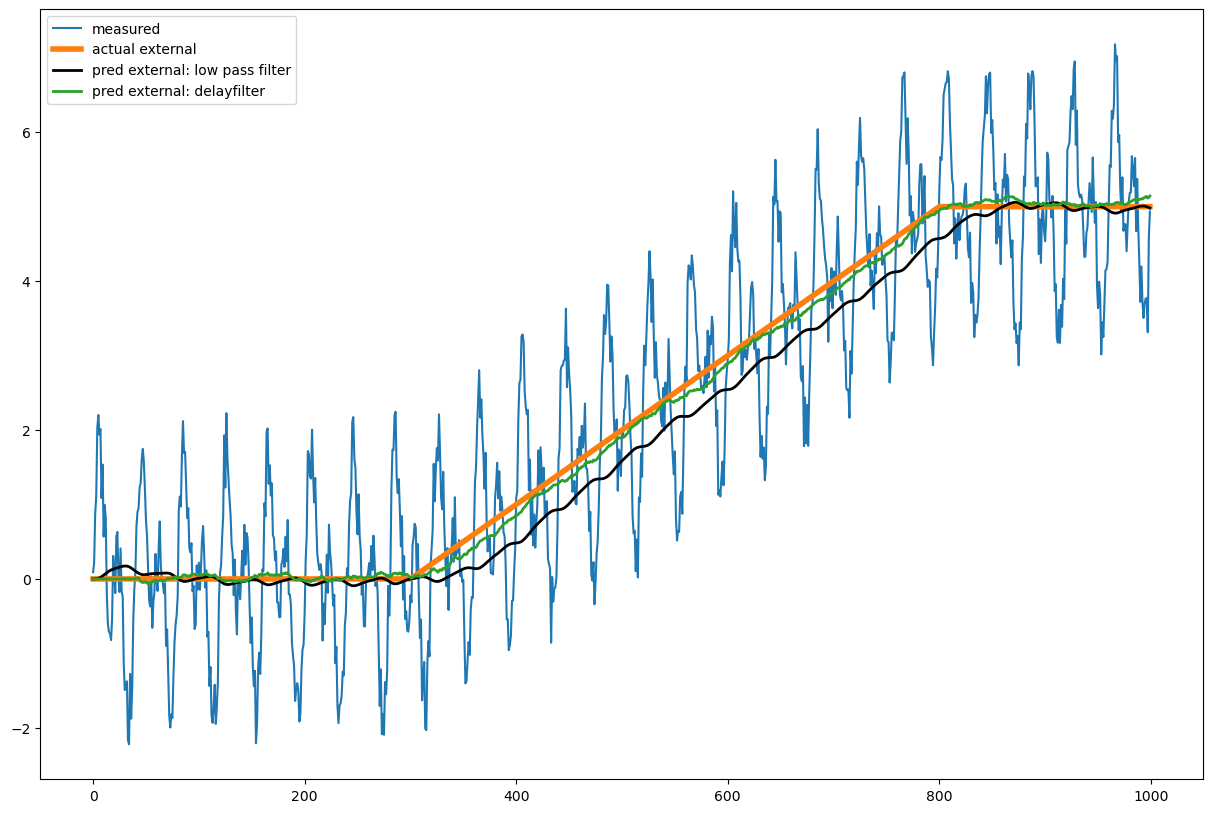

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, fftfreq, ifft


dt = .01
fs = 1/dt

t = np.arange(0, 10, dt)

f0 = 2.5 # fundamental frequency of the blood pulses
y_harmonic = np.sin(2*np.pi*f0*t) + np.sin(4*np.pi*f0*t)  # example blood pulses
y_other = np.heaviside(t-3, 0)*(t-3) - np.heaviside(t-8, 0)*(t-8)  # the signal we want to recover
y_noise = 0*np.random.rand(len(t))-.5

y_measured = y_harmonic + y_other + y_noise

def method_filter(y_measured, wn): # low pass filter

    sos = signal.butter(2, wn, 'lp', fs=fs, output='sos')  # 2nd order lowpass filter
    y_filtered = signal.sosfilt(sos, y_measured)

    return y_filtered


def method_filter_delayed(y_measured, delay): # delay filter

    y_recovered = np.zeros_like(y_measured)

    for i in range(delay, len(y_measured)):
        dy = y_measured[i]-y_measured[i-delay]  # the sginal has changed this much in 1 period
        y_recovered[i] = y_recovered[i-1] + dy*dt/f0*np.pi*2  # integrate
        
    return y_recovered  # note - in a real signal with noise, you may want to futher filter this


delay = int(1/(f0*dt))  # number of sample points in 1 period of blood pulses  (this could be generalized by taking teh fft of of the last N points, finding fundamental freq this would handle the case where the frequency is changing slowly)

y_filtered1 = method_filter(y_measured, wn = .5)
y_filtered2 = method_filter_delayed(y_measured, delay)

fig, ax = plt.subplots()
ax.plot(y_measured, label = 'measured')
ax.plot(y_other, label = 'actual external', linewidth = 4)

ax.plot(y_filtered1, label = 'pred external: low pass filter', linewidth = 2, c = 'k')
ax.plot(y_filtered2, label = 'pred external: delayfilter', linewidth = 2)

ax.legend()
fig.set_size_inches(15, 10)

In [2]:
# This code does not work yet

# y = np.sin(5*t) + 0.5*np.sin(2.5*t) + t
# yp = y.copy()
# from scipy.signal.windows import blackman



# def predict_next_point(y, fs):

#     ym = np.mean(y)
#     y = signal.detrend(y)

#     N = len(y)
#     #w = blackman(N)

#     T = 1/fs
#     yf = fft(y*1)
#     freqs = fftfreq(N, T)
#     yf2 = yf*np.exp(np.array([0+1j])*freqs*T)

#     #I = np.logical_and(np.abs(freqs) > 5,   np.abs(freqs) < 0)
#     #yf2[I]=0

#     yr2 = ifft(yf2)
#     return yr2[[-1]]

# plt.plot(t, y)

# for i in range(200):
#     yp = predict_next_point(y[-1000:], fs)
#     plt.plot(t[-1]+T*i, yp, 'x')
#     y = np.concatenate((y, yp))